In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df = pd.read_csv('vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [71]:
counts = df.nunique()
counts.name = 'Unique Values'
nans = df.isnull().mean()
nans.name = 'NaN Percentage'
ranges = df.select_dtypes(include='number').agg(lambda x: f"{x.min():.0f}-{x.max():.0f}")
ranges.name = 'Range'

# Merge the counts, NaN percentages, and ranges into a single DataFrame
desc = pd.merge(counts, nans, left_index=True, right_index=True)
desc = pd.merge(desc, ranges, left_index=True, right_index=True,how='left')
desc

,Unique Values,NaN Percentage,Range
Rank,16598,0.000000,1-16600
Name,11493,0.000000,NaN
Platform,31,0.000000,NaN
Year,39,0.016327,1980-2020
Genre,12,0.000000,NaN
Publisher,578,0.003494,NaN
NA_Sales,409,0.000000,0-41
EU_Sales,305,0.000000,0-29
JP_Sales,244,0.000000,0-10
Other_Sales,157,0.000000,0-11


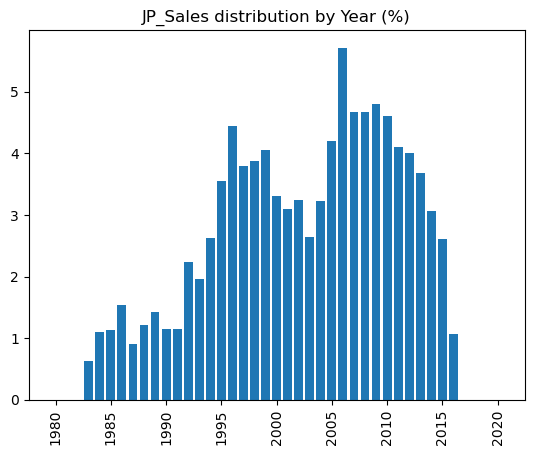

In [96]:
def plot_sales_dist(df,col, sales_col,title, top_x = False):
    """ plot a normalized histogram of a column by global sales"""
    sales_sums = df[[col, sales_col]].groupby(col)[sales_col].sum()
    normalized = sales_sums/sum(df[sales_col])*100
    
    sorted_values = normalized.sort_values(ascending=False)
    if top_x:
        sorted_values = sorted_values[:top_x]
    plt.bar(sorted_values.index, sorted_values.values)
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.show()
col = 'Year'
sales_col = 'JP_Sales'
plot_sales_dist(df,col,sales_col,f'{sales_col} distribution by {col} (%)')

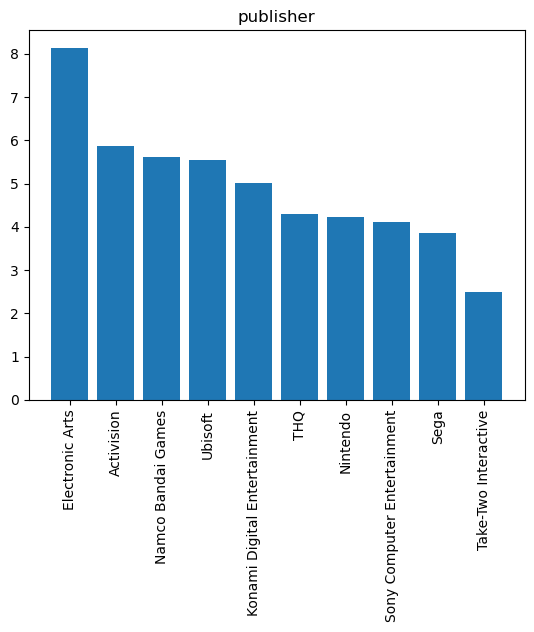

In [70]:
# plot(df['Name'],'top games distribution (%)',15)
# plot(df['Year'],"% of top selling games by year of release")
plot(df['Publisher'],'publisher',10)

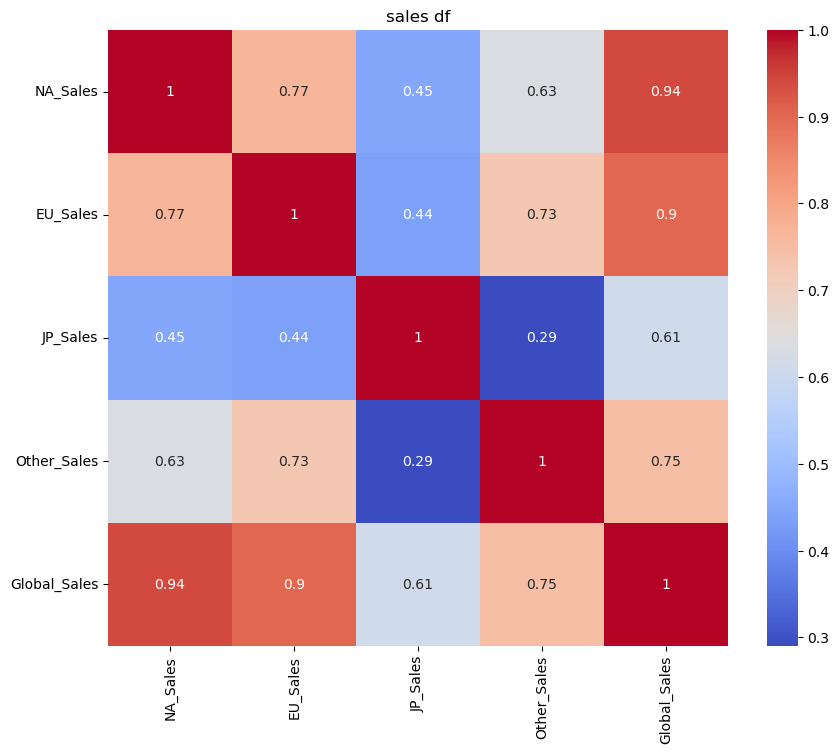

In [77]:
def plot_correlation(df, title):
    """ plot correlation of columns in a dataframe """
    corr_matrix = df.corr()
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title(title)
    plt.xticks(rotation='vertical')
    plt.yticks(rotation='horizontal')
    plt.show()

sales_df = df[[x for x in list(df) if 'Sales' in x]]
plot_correlation(sales_df,'sales df')


In [26]:
df.isnull().mean()

Rank            0.000000
Name            0.000000
Platform        0.000000
Year            0.016327
Genre           0.000000
Publisher       0.003494
NA_Sales        0.000000
EU_Sales        0.000000
JP_Sales        0.000000
Other_Sales     0.000000
Global_Sales    0.000000
dtype: float64

In [27]:
for col in ['Name','Platform','Genre','Publisher']:
    series = df[col]
    uniques = len(series.unique())
    print(f"----- Column: {col} ({uniques}) -----")
    counts = series.value_counts()/len(df)
    print(counts[:min(3,len(counts))])
    

----- Column: Name (11493) -----
Need for Speed: Most Wanted    0.000723
Ratatouille                    0.000542
FIFA 14                        0.000542
Name: Name, dtype: float64
----- Column: Platform (31) -----
DS     0.130317
PS2    0.130196
PS3    0.080070
Name: Platform, dtype: float64
----- Column: Genre (12) -----
Action    0.199783
Sports    0.141342
Misc      0.104772
Name: Genre, dtype: float64
----- Column: Publisher (579) -----
Electronic Arts       0.081395
Activision            0.058742
Namco Bandai Games    0.056151
Name: Publisher, dtype: float64
